In [17]:
import pandas as pd

In [18]:
FILENAME_DEV = './data/dataset_conll/all.sentence.dev.txt'
FILENAME_TRAIN = './data/dataset_conll/all.sentence.train.txt'
FILENAME_TEST = './data/dataset_conll/all.sentence.test.txt'
FILES = [FILENAME_DEV, FILENAME_TRAIN, FILENAME_TEST]

LABELS = {
    "__label__z_minus_m": "Negative sentiment", 
    "__label__z_plus_m": "Positive sentiment",
    "__label__z_zero": "No sentiment",
    "__label__z_amb": "Unsure",
    }


In [19]:
dataframes = []
for filename in FILES:
    with open(filename, 'r', encoding="utf8") as f:
        lines = f.readlines()
        data = [line.strip() for line in lines]
        # get last word from each item as a label and match with data
        labeled_data = []
        for item in data:
            label = item.split()[-1]
            sentence_data = ' '.join(item.split()[:-1])
            labeled_data.append((sentence_data, LABELS[label]))

        # create a dataframe
        df = pd.DataFrame(labeled_data, columns=['sentence', 'label'])
        dataframes.append(df)

# merge all dataframes
df = pd.concat(dataframes)

KeyError: '__label__z_minus_m'

In [ ]:
df.head()

,sentence,label
0,Moim zdaniem jest wart jakieś 1100zł .,__label__z_minus_m
1,co jest masakra szczególnie jak na początku ch...,__label__z_minus_m
2,Poza tym krzesło ma bardzo duże luzy .,__label__z_minus_m
3,"Ścielenie łóżek , sprzątanie sal po organizowa...",__label__z_zero
4,Parę niższych osób siedziało i było im wygodnie .,__label__z_amb


In [ ]:
labels = pd.DataFrame(df['label'].value_counts())
labels.head()

,count
label,
__label__z_minus_m,21156
__label__z_plus_m,15324
__label__z_zero,14101
__label__z_amb,6885


In [ ]:
df[df['label']=="No sentiment"].head()

,sentence,label
3,"Ścielenie łóżek , sprzątanie sal po organizowa...",__label__z_zero
8,"Lekarza polecił mi mój znajomy , twierdząc , ż...",__label__z_zero
11,Aby wykonać pomiar wystarczy tylko umieścić pa...,__label__z_zero
16,Instruktorzy mogą wdrażać różne scenariusze ; ...,__label__z_zero
17,"Dodała , że dzieci pozostawione same sobie , b...",__label__z_zero


In [ ]:
df[df['label']=="Unsure"].head()

,sentence,label
4,Parę niższych osób siedziało i było im wygodnie .,__label__z_amb
6,Za tą cenę ?,__label__z_amb
10,Na półmisku wjechały frytki ( do wędliny ! ) i...,__label__z_amb
18,"Plusem jest to , że poza krwawieniem i obrzęki...",__label__z_amb
33,Jedyny minus to nieco utrudniony dojazd spowod...,__label__z_amb


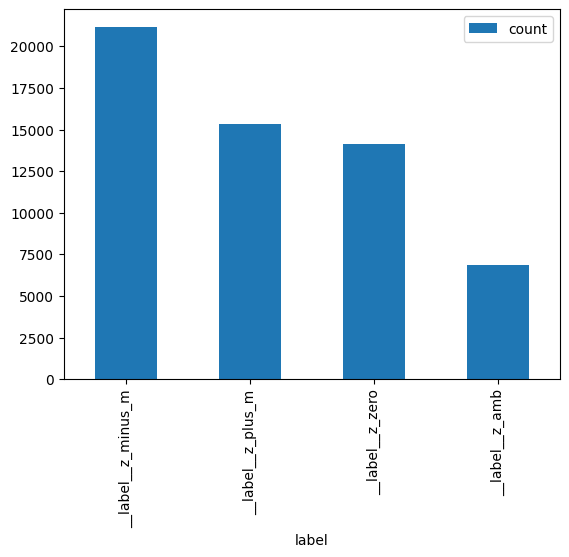

In [ ]:
# display labels distribution
import matplotlib.pyplot as plt
labels.plot(kind='bar')
plt.show()


In [ ]:
# find missing labels or sentences
missing_labels = df[df['label'].isnull()]
missing_labels.head()

,sentence,label


In [ ]:
missing_sentences = df[df['sentence'].isnull()]
missing_sentences.head()


,sentence,label


In [ ]:
# split data into train, test and validation
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train, validation = train_test_split(test, test_size=0.5, random_state=42, shuffle=True)

In [ ]:
# ensure that the distribution of labels is the same in all datasets
train_label_counts = train['label'].value_counts()
validation_label_counts = validation['label'].value_counts()
test_label_counts = test['label'].value_counts()

# display ratio of labels in each dataset
train_label_ratios = train_label_counts / train_label_counts.sum()
validation_label_ratios = validation_label_counts / validation_label_counts.sum()
test_label_ratios = test_label_counts / test_label_counts.sum()

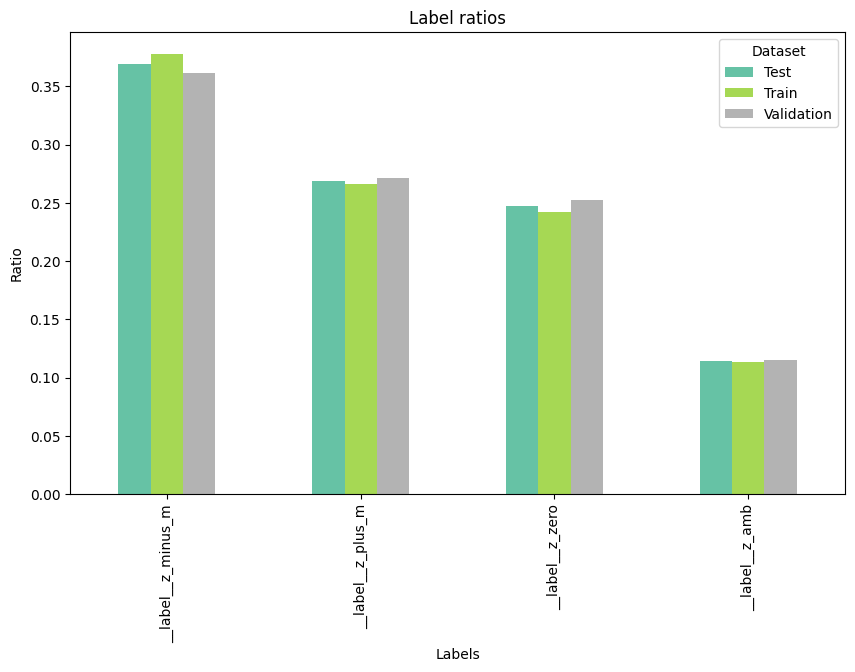

In [ ]:
# Create a DataFrame to combine the ratios for comparison
df_ratios = pd.DataFrame({'Test': test_label_ratios, 'Train': train_label_ratios, 'Validation': validation_label_ratios})

# Plotting the bar chart to compare the ratios for different labels
df_ratios.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Label ratios')
plt.ylabel('Ratio')
plt.xlabel('Labels')
plt.legend(title='Dataset')
plt.show()

In [ ]:
import os

# ensure directories exist
if not os.path.exists('./output'):
    os.makedirs('./output')

train.to_csv('./output/train.csv', index=False)
validation.to_csv('./output/validation.csv', index=False)
test.to_csv('./output/test.csv', index=False)